In [1]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
y_test.shape

(10000,)

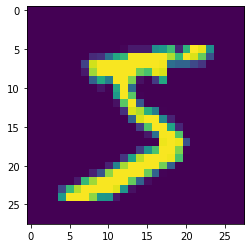

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [31]:
y_train[0]

5

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

- Flatten: 打平, 把圖片從28 * 28 變成 784
- Dense: 隱藏層 256 個神經元, 激活函數: relu; dense = w*x + b
- Dropout: 隨機捨棄 20 % 的神經元

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Dense: x * w + b
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [46]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          epochs=10,
          verbose = 1,
          validation_data = (x_test, y_test) )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6095 - accuracy: 0.8422 - val_loss: 0.3060 - val_accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2861 - accuracy: 0.9183 - val_loss: 0.2505 - val_accuracy: 0.9291
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2338 - accuracy: 0.9327 - val_loss: 0.2088 - val_accuracy: 0.9379
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1993 - accuracy: 0.9433 - val_loss: 0.1834 - val_accuracy: 0.9480
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1731 - accuracy: 0.9509 - val_loss: 0.1662 - val_accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9565 - val_loss: 0.1449 - val_accuracy: 0.9576
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9610 - val_loss: 0.1342 - val_accuracy:

In [0]:
predictions = model(x_test).numpy()

In [37]:
predictions.shape

(10000, 10)

In [0]:
import numpy as np
y_pred = np.argmax(predictions, axis = 1)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.9783

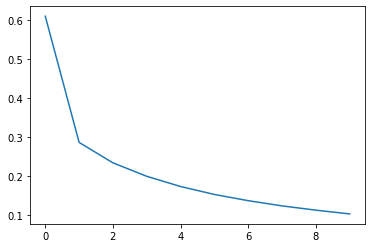

In [47]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

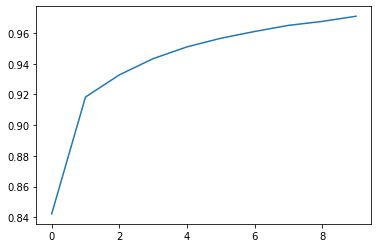

In [48]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

## 小任務
- 請使用 tf.keras 搭建一個深度學習模型，預測iris 的類別

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(iris.data)

In [0]:
y= iris.target

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [67]:
train_y.shape

(105,)

In [0]:
from  tensorflow.keras import models
from  tensorflow.keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_shape = (4,)))
model.add(layers.Dense(3))

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(train_X, train_y, 
          epochs=100,
          verbose = 0,
          validation_data = (test_X, test_y) )

In [0]:
history = model.fit(train_X, train_y, 
          epochs=100,
          verbose = 0,
          validation_data = (test_X, test_y) )

In [0]:
predictions = model(test_X).numpy()

In [0]:
pred_y = np.argmax(predictions, axis = 1)

In [83]:
accuracy_score(test_y, pred_y)

0.9555555555555556

In [84]:
confusion_matrix(test_y, pred_y)

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]])

## Preserve Model

In [0]:
model.save('iris_model.h5')

In [0]:
m2 = models.load_model('iris_model.h5')

In [0]:
predictions = m2(test_X).numpy()

## 預測客戶是否流失

### 讀取資料

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 資料前處理

In [0]:
df = df.iloc[:,3:]

In [93]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [0]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']

In [97]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [0]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']

In [0]:
m  = pandas.concat([geo, gender, df], axis = 1)

In [0]:
del m['Gender']
del m['Geography']

In [103]:
m.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


### 將資料切分成訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
X = m.iloc[:,:-1]
y = m.iloc[:,-1]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state  = 42)

In [112]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

### 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X) # 先產生結構，再做資料轉化
test_X = sc.transform(test_X) # 做資料轉化

In [114]:
a = np.array([[50],[60], [70]])
sc = StandardScaler()
a2 = sc.fit_transform(a) # 先產生結構，再做資料轉化
a2

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [115]:
sc.mean_, sc.var_

(array([60.]), array([66.66666667]))

In [118]:
(a - sc.mean_) / np.sqrt(sc.var_)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [119]:
c = np.array([[100]])
sc.transform(c)

array([[4.89897949]])

In [120]:
(c - sc.mean_) / np.sqrt(sc.var_)

array([[4.89897949]])

### 建立模型

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(6, activation='relu',input_shape = (11,) ))
model.add(layers.Dense(6, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

In [125]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_X, train_y,
                    epochs = 100,
                    verbose = 0,
                    validation_data = (test_X, test_y)
                    )

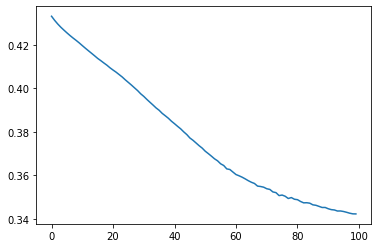

In [130]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

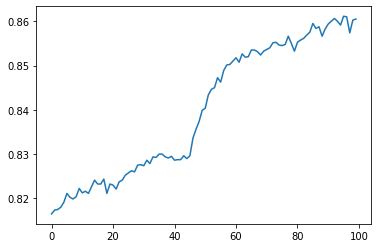

In [131]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

### 評估模型

In [0]:
predictions = model(test_X).numpy()

In [0]:
pred_y = (predictions > 0.5).astype(int).flatten()

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.8565

In [139]:
confusion_matrix(test_y, pred_y)

array([[1538,   69],
       [ 218,  175]])

## 選擇優化器

In [0]:
def tarinProcess(optimizer):
    model = models.Sequential()
    model.add(layers.Dense(units = 6, activation = 'relu', input_dim = 11))
    model.add(layers.Dense(units = 1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(train_X, train_y,
                        batch_size=30,
                        epochs=100,
                        verbose=0,
                        validation_data=(test_X, test_y))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:
history5 = tarinProcess('Adam')

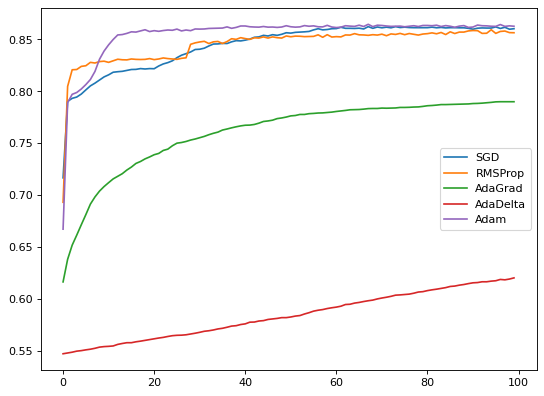

In [146]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()

## k-fold cross validation

In [0]:
def buildClassifier(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(6, activation='relu', input_dim = 11),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
from sklearn.model_selection import cross_val_score
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 30, 
                                                            epochs = 100, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_y, cv = 5)

In [149]:
accuracies

array([0.875     , 0.84750003, 0.87374997, 0.84625   , 0.84500003])

In [150]:
accuracies.mean()

0.8575000047683716

In [151]:
accuracies.std()

0.013806685945854836

## Dropout

In [0]:
def buildClassifier(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(6, activation='relu', input_dim = 11),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
from sklearn.model_selection import cross_val_score
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 30, 
                                                            epochs = 100, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_y, cv = 5)

In [155]:
accuracies.mean()

0.8412500023841858

In [156]:
accuracies.std()

0.011917701015523833

## Grid Search

In [158]:
from sklearn.model_selection import GridSearchCV

classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifier, 
    epochs = 10,verbose = 0)

parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)

grid_search     = grid_search.fit(train_X, train_y)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [159]:
best_parameters

{'batch_size': 15, 'optimizer': 'rmsprop'}

In [160]:
best_accuracy

0.834375

## 模型比較

### 深度學習模型

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(6, activation='relu',input_shape = (11,) ))
model.add(layers.Dense(6, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_X, train_y,
                    epochs = 100,
                    verbose = 0,
                    validation_data = (test_X, test_y)
                    )

###  機器學習模型

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

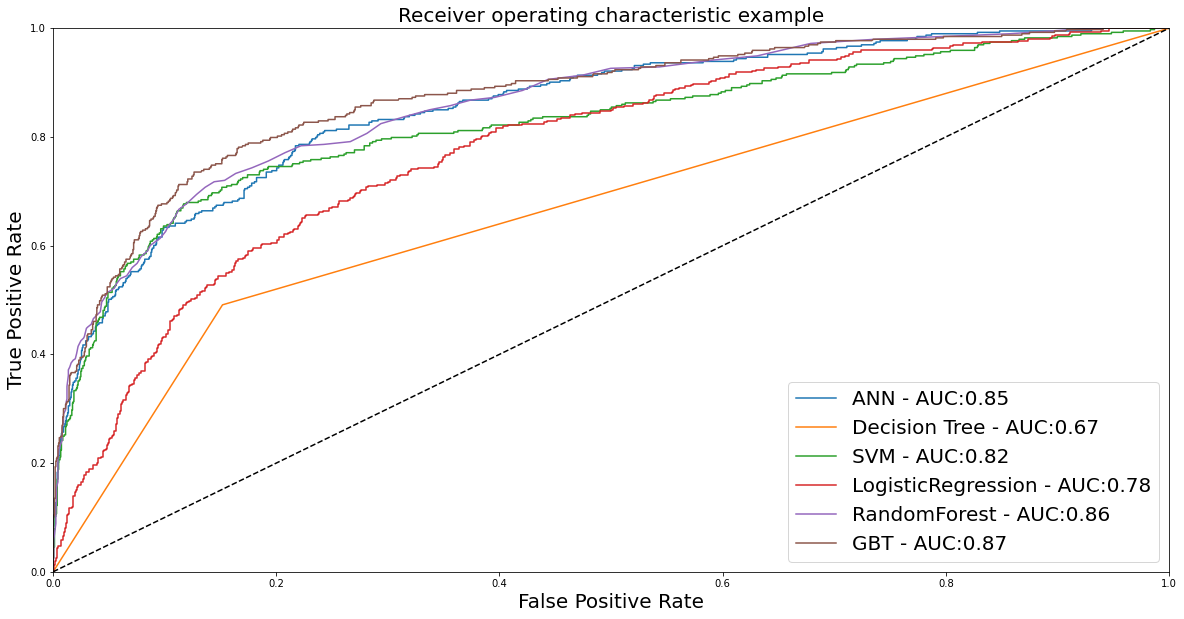

In [168]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4,clf5], 
                      ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GBT']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        y_pred = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()
